In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

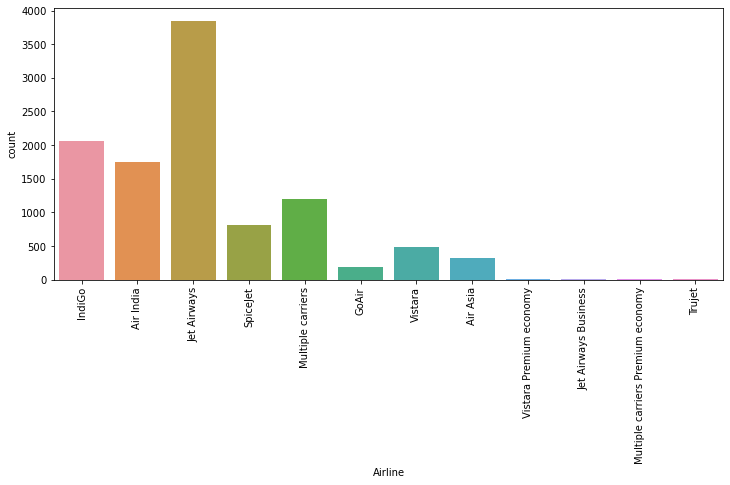

In [5]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(df['Airline'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

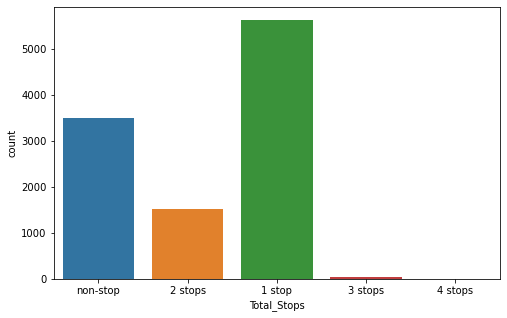

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(df['Total_Stops'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source', ylabel='count'>

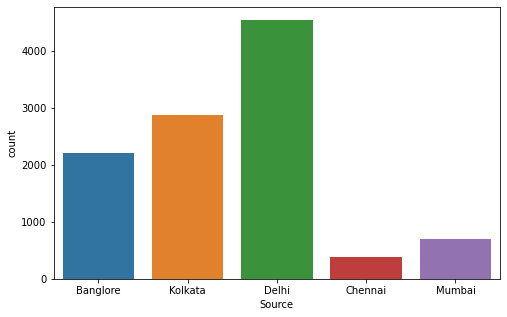

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(df['Source'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

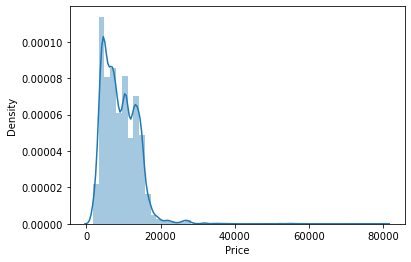

In [8]:
sns.distplot(df['Price'], kde=True)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

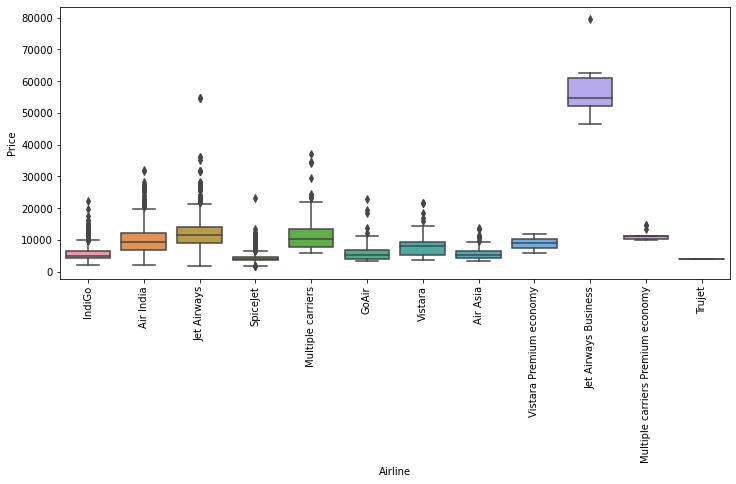

In [9]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.boxplot(x='Airline', y='Price', data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

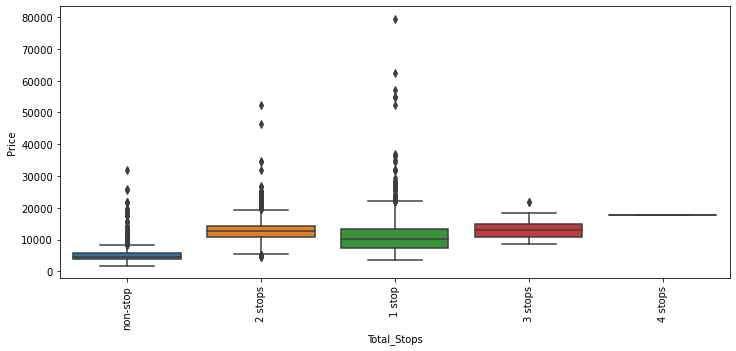

In [10]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.boxplot(x='Total_Stops', y='Price', data=df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

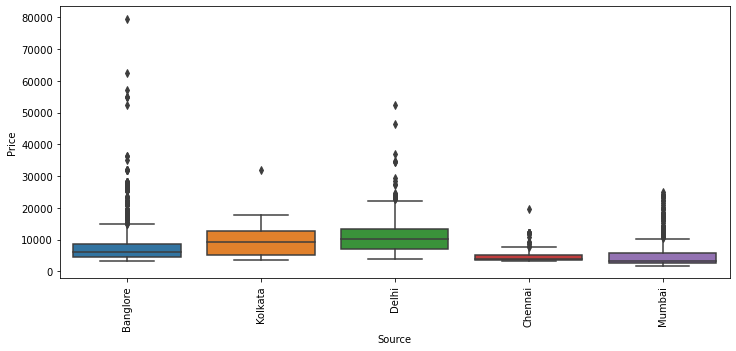

In [11]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.boxplot(x='Source', y='Price', data=df)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
Q1 = np.percentile(df['Price'], 25)
Q3 = np.percentile(df['Price'], 75)
IQR = Q3-Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df.shape

(10588, 11)

In [16]:
df['Jorney_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Jorney_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

In [17]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
df['Duration_hour'] = df['Duration'].apply(lambda x: x.split('h')[0] if 'h' in x else 0)
df['Duration_minute'] = df['Duration'].apply(lambda x: x.split('m')[0].split()[-1] if 'm' in x else 0)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [24]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [25]:
def stops(x):
    if x == 'non-stop':
        return 0
    elif x == '1 stop':
        return 1
    elif x == '2 stops':
        return 2
    elif x == '3 stops':
        return 3
    else:
        return 4

In [26]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: stops(x))

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,16,50,21,35,4,45


In [28]:
df = df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis=1)

In [29]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Jorney_day,Jorney_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10588 non-null  object
 1   Source           10588 non-null  object
 2   Destination      10588 non-null  object
 3   Total_Stops      10588 non-null  int64 
 4   Price            10588 non-null  int64 
 5   Jorney_day       10588 non-null  int64 
 6   Jorney_month     10588 non-null  int64 
 7   Dep_hour         10588 non-null  int64 
 8   Dep_minute       10588 non-null  int64 
 9   Arrival_hour     10588 non-null  int64 
 10  Arrival_minute   10588 non-null  int64 
 11  Duration_hour    10588 non-null  object
 12  Duration_minute  10588 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


In [31]:
df['Duration_hour'] = df['Duration_hour'].astype('int')
df['Duration_minute'] = df['Duration_minute'].astype('int')

<AxesSubplot:>

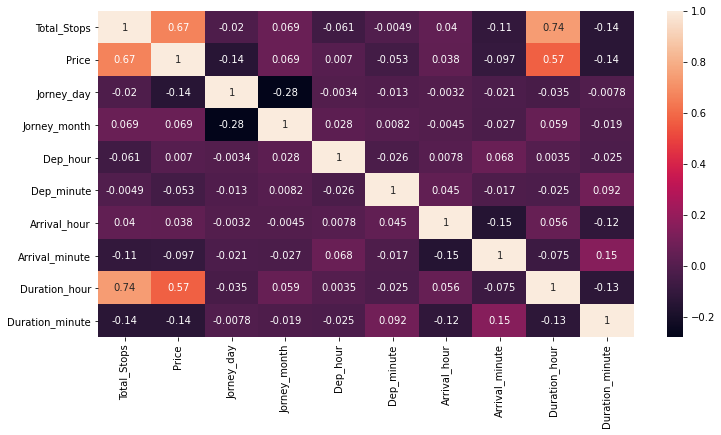

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [84]:
X = df.drop('Price', axis=1)
y = df['Price']

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [86]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2])], remainder='passthrough')
X = ct.fit_transform(X)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

print('MAE:', mean_absolute_error(y_test, xgbr.predict(X_test)))
print('MSE:', mean_squared_error(y_test, xgbr.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgbr.predict(X_test))))
print('r2 score:', r2_score(y_test, xgbr.predict(X_test)))

MAE: 1065.2513590264252
MSE: 2366080.6251513786
RMSE: 1538.2069513402214
r2 score: 0.8624402770160638


In [76]:
import pickle
pickle.dump(xgbr, open('flight_model.pkl', 'wb'))